# LetsGrowMore Data Science Internship January 2022

# Task9 - Handwritten equation solver using CNN

# Author : Param Chordiya

## Part 2 Model Training and CNN Test

In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_final.csv to train_final.csv


In [ ]:
df_train=pd.read_csv('train_final.csv',index_col=False)
labels=df_train[['784']]

In [ ]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,232,232,232,232,232,232,232,232,232,232,232,232,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0,0,191,191,191,191,191,191,191,191,191,191,191,191,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,232,232,232,232,232,232,232,232,232,232,232,232,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,96,59,41,0,0,0,0,0,0,23,255,219,219,219,219,219,219,219,219,219,219,219,219,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,219,219,219,219,219,219,219,219,219,219,219,219,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [ ]:
labels=np.array(labels)

In [ ]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [ ]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,232,232,232,232,232,232,232,232,232,232,232,232,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0,0,191,191,191,191,191,191,191,191,191,191,191,191,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,232,232,232,232,232,232,232,232,232,232,232,232,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,96,59,41,0,0,0,0,0,0,23,255,219,219,219,219,219,219,219,219,219,219,219,219,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,219,219,219,219,219,219,219,219,219,219,219,219,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.shape

(156617, 784)

In [ ]:
temp=df_train.to_numpy()

In [ ]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [ ]:
temp.shape[0]

156617

In [ ]:
X_train.shape

(156617, 28, 28, 1)

In [ ]:
l=[]
for i in range(47504):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [ ]:
np.random.seed(7)

In [ ]:
len(l[0])

1

In [ ]:
X_train.shape

(156617, 28, 28, 1)

In [ ]:
# convolution neural network
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.models import model_from_json

In [ ]:
model.fit(X_train, cat, epochs=10, batch_size=200,shuffle=True,verbose=1)

Epoch 1/10
784/784 [==============================] - 18s 12ms/step - loss: 0.4772 - accuracy: 0.8910
Epoch 2/10
784/784 [==============================] - 9s 11ms/step - loss: 0.0823 - accuracy: 0.9768
Epoch 3/10
784/784 [==============================] - 9s 11ms/step - loss: 0.0495 - accuracy: 0.9857
Epoch 4/10
784/784 [==============================] - 9s 11ms/step - loss: 0.0360 - accuracy: 0.9894
Epoch 5/10
784/784 [==============================] - 9s 11ms/step - loss: 0.0291 - accuracy: 0.9914
Epoch 6/10
784/784 [==============================] - 9s 11ms/step - loss: 0.0245 - accuracy: 0.9924
Epoch 7/10
784/784 [==============================] - 9s 11ms/step - loss: 0.0209 - accuracy: 0.9939
Epoch 8/10
784/784 [==============================] - 9s 11ms/step - loss: 0.0191 - accuracy: 0.9944
Epoch 9/10
784/784 [==============================] - 9s 11ms/step - loss: 0.0177 - accuracy: 0.9947
Epoch 10/10
784/784 [==============================] - 9s 11ms/step - loss: 0.0167 - accur

In [ ]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [ ]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# K.set_image_dim_ordering('th')
from keras.models import model_from_json

In [ ]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.h5") #trained weight

### Test Image 

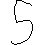

In [ ]:
from IPython.display import Image
Image(filename='test1.jpg',width=400,height=400)

In [ ]:
import cv2
import numpy as np
img = cv2.imread('test1.jpg',cv2.IMREAD_GRAYSCALE)

In [ ]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))


        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

1
[[11, 0, 22, 45]]
[[0]]
0
[[11, 0, 22, 45]]


In [ ]:
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    #result=loaded_model.predict_classes(train_data[i])
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    print(result[0])
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    
print(s)

5
5


# Result

In [ ]:
eval(s)


5

# Conclusion: Hence the model gives accurate result for test image as 5